In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data
from tensorflow.keras.datasets import imdb

In [3]:
max_features=10000
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

In [4]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
words=imdb.get_word_index()

In [6]:
#words

In [7]:
word_index={index:word for word,index in words.items()}

In [8]:
#word_index

In [9]:
#In imdb dataset 0, 1, 2 are reserved for padding, start, and unknown tokens. Actual word indexing starts from 3
print(" ".join([word_index.get(i-3,'?') for i in X_train[0]]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [10]:
#Preprocessing

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
X_train=pad_sequences(X_train,maxlen=500)
X_test=pad_sequences(X_test,maxlen=500)

In [66]:
print(X_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [14]:
#Building model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Embedding,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [16]:
early_stop=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [17]:
model=Sequential([
    Input(shape=(500,)),
    Embedding(max_features,128,input_length=500),
    SimpleRNN(128,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [18]:
model.compile(optimizer= Adam(learning_rate=1e-4),loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,025 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=[early_stop])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 68ms/step - accuracy: 0.5345 - loss: 0.6892 - val_accuracy: 0.6210 - val_loss: 0.6564
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.7480 - loss: 0.5342 - val_accuracy: 0.6738 - val_loss: 0.5833
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8400 - loss: 0.3799 - val_accuracy: 0.8798 - val_loss: 0.2961
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9106 - loss: 0.2359 - val_accuracy: 0.8484 - val_loss: 0.3649
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9166 - loss: 0.2274 - val_accuracy: 0.8768 - val_loss: 0.2974
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9467 - loss: 0.1549 - val_accuracy: 0.8862 - val_loss: 0.2860
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9548 - loss: 0.1321 - val_accuracy: 0.8898 - val_loss: 0.3440
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9616 - loss: 0.1140 - 

In [21]:
loss=pd.DataFrame(history.history)
loss

,accuracy,loss,val_accuracy,val_loss
0,0.58020,0.674604,0.6210,0.656422
1,0.78390,0.474943,0.6738,0.583282
2,0.86795,0.325081,0.8798,0.296079
3,0.91080,0.235836,0.8484,0.364940
4,0.92465,0.203589,0.8768,0.297450
5,0.94345,0.159788,0.8862,0.286038
6,0.95125,0.141022,0.8898,0.343991
7,0.96000,0.118746,0.8812,0.361799
8,0.96305,0.107105,0.8808,0.350193
9,0.95920,0.115097,0.8782,0.353947


<Axes: >

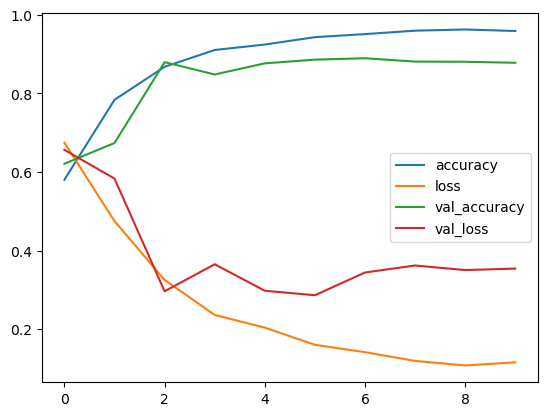

In [22]:
loss.plot()

In [48]:
def Decode_Review(review):
    return " ".join([word_index.get(i-3,'?') for i in review])

In [62]:
Decode_Review(X_test[6])

"later used by frank ? in mr deeds goes to town and meet john ? but in ? no one individual is cast as a hero or heroine the story is told through a series of scenes that are combined in a special effect known as montage the editing and selection of short segments to produce a desired effect on the viewer d w griffith also used the montage but no one ? it so well as ? br br the artistic filming of the crew sleeping in their is ? by the ? swinging of tables suspended from chains in the ? in contrast the confrontation between the crew and their officers is charged with electricity and the ? ? of the masses demonstrate their rage with injustice br br ? introduced the technique of showing an action and repeating it again but from a slightly different angle to demonstrate intensity the breaking of a plate bearing the words give us this day our daily bread ? the beginning of the end this technique is used in last year at ? also when the ? surgeon is tossed over the side his ? ? from the ? it 

In [72]:
def Preprocess_text(text):
    text=text.lower().split()
    text=[words.get(i,2)+3 for i in text]
    padded_text=pad_sequences([text],maxlen=500)
    return padded_text

In [82]:
def Prediction():
    text=input("Enter the review : ")
    pred=model.predict(Preprocess_text(text))
    print(f"Review : {text}")
    if pred>0.5:
        print(f'Prediction : Positive')
    else:
        print(f'Prediction : Negitive')

In [88]:
Prediction()

Enter the review :  This movie was fantastic! The acting was great and the plot was thrilling.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Review : This movie was fantastic! The acting was great and the plot was thrilling.
Prediction : Positive


In [90]:
Prediction()

Enter the review :  The movie was average, but it is watchable.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Review : The movie was average, but it is watchable.
Prediction : Positive


In [92]:
Prediction()

Enter the review :  One of the worst movie I have ever watched


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Review : One of the worst movie I have ever watched
Prediction : Negitive
